In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('pcqm4mv2-20k.csv')

In [3]:
df = df[~df['homo_lumo_gap'].isna()]

In [4]:
df

,cxsmiles,homo_lumo_gap
0,[H]OC(=O)/C(=C(\[H])C([H])([H])C([H])([H])C([H...,6.122562
1,[H]OC1=NC2=C([H])C([H])=C(C3=NC([H])=C([H])S3)...,4.179669
2,[H]OC([H])(C([H])([H])C([H])([H])OC([H])([H])[...,8.522606
4,[H]C1=C(C([H])([H])[H])C(=O)C(C([H])([H])[H])=...,2.985089
6,[H]O/C(=N/C1=C([H])N(C([H])([H])[H])N=C1[H])[C...,5.627314
...,...,...
19995,[H]OC(=O)C1=C(C([H])([H])SC([H])([H])[C@@]([H]...,4.666753
19996,[H]N(C([H])([H])[H])[C@]([H])(C([H])([H])OC1([...,7.537554
19997,[H]C1=NC([H])=C2C(=N1)C([H])([H])C([H])([H])C(...,5.251797
19998,[H]OC([H])([H])C([H])([H])C([H])([H])C([H])([H...,8.479068


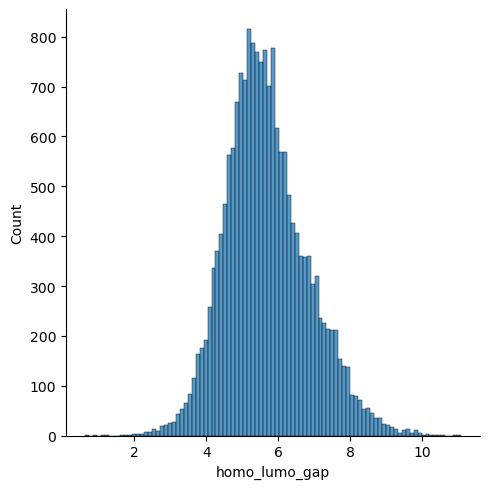

In [5]:
sns.displot(df['homo_lumo_gap'])

In [6]:
quantiles = np.quantile(df['homo_lumo_gap'], [0.2, 0.4, 0.6, 0.8])
quantiles

array([4.74022328, 5.30349895, 5.84228437, 6.62052998])

In [7]:
def bracketize(x):
    for i, q in enumerate(quantiles):
        if x < q:
            return i
    
    return len(quantiles)

In [8]:
brackets = df['homo_lumo_gap'].map(bracketize)
brackets

0        3
1        0
2        4
4        0
6        2
        ..
19995    0
19996    4
19997    1
19998    4
19999    2
Name: homo_lumo_gap, Length: 18404, dtype: int64

In [9]:
brackets.value_counts()

homo_lumo_gap
2    3695
4    3683
3    3681
0    3677
1    3668
Name: count, dtype: int64

In [10]:
df['homo_lumo_gap_b0'] = (brackets == 0).astype(int)
df['homo_lumo_gap_b1'] = (brackets == 1).astype(int)
df['homo_lumo_gap_b2'] = (brackets == 2).astype(int)
df['homo_lumo_gap_b3'] = (brackets == 3).astype(int)
df['homo_lumo_gap_b4'] = (brackets == 4).astype(int)

In [11]:
df

,cxsmiles,homo_lumo_gap,homo_lumo_gap_b0,homo_lumo_gap_b1,homo_lumo_gap_b2,homo_lumo_gap_b3,homo_lumo_gap_b4
0,[H]OC(=O)/C(=C(\[H])C([H])([H])C([H])([H])C([H...,6.122562,0,0,0,1,0
1,[H]OC1=NC2=C([H])C([H])=C(C3=NC([H])=C([H])S3)...,4.179669,1,0,0,0,0
2,[H]OC([H])(C([H])([H])C([H])([H])OC([H])([H])[...,8.522606,0,0,0,0,1
4,[H]C1=C(C([H])([H])[H])C(=O)C(C([H])([H])[H])=...,2.985089,1,0,0,0,0
6,[H]O/C(=N/C1=C([H])N(C([H])([H])[H])N=C1[H])[C...,5.627314,0,0,1,0,0
...,...,...,...,...,...,...,...
19995,[H]OC(=O)C1=C(C([H])([H])SC([H])([H])[C@@]([H]...,4.666753,1,0,0,0,0
19996,[H]N(C([H])([H])[H])[C@]([H])(C([H])([H])OC1([...,7.537554,0,0,0,0,1
19997,[H]C1=NC([H])=C2C(=N1)C([H])([H])C([H])([H])C(...,5.251797,0,1,0,0,0
19998,[H]OC([H])([H])C([H])([H])C([H])([H])C([H])([H...,8.479068,0,0,0,0,1


In [12]:
df.to_csv('pcqm4mv2-20k-classifigression.csv', index=False)

In [ ]:
old